In [1]:
#pip install graphviz

In [2]:
from hashlib import sha1
import pandas as pd
import altair as alt
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from IPython.display import HTML
import graphviz
from display_tree import display_tree
alt.renderers.enable('html')


RendererRegistry.enable('html')

In [3]:
candy_df = pd.read_csv('https://raw.githubusercontent.com/UBC-MDS/MCL-DSCI-511-programming-in-python/master/data/candybars.csv')
candy_df.head()

,name,weight,chocolate,peanuts,caramel,nougat,cookie_wafer_rice,coconut,white_chocolate,multi,available_canada_america
0,Coffee Crisp,50,1,0,0,0,1,0,0,0,Canada
1,Butterfinger,184,1,1,1,0,0,0,0,0,America
2,Skor,39,1,0,1,0,0,0,0,0,Both
3,Smarties,45,1,0,0,0,0,0,0,1,Canada
4,Twix,58,1,0,1,0,1,0,0,1,Both


In [4]:
candy_df = candy_df.drop(columns = ['weight'])
candy_df = candy_df.rename(columns ={'available_canada_america':'availability','weight':'weight_gm'})
candy_df.head()

,name,chocolate,peanuts,caramel,nougat,cookie_wafer_rice,coconut,white_chocolate,multi,availability
0,Coffee Crisp,1,0,0,0,1,0,0,0,Canada
1,Butterfinger,1,1,1,0,0,0,0,0,America
2,Skor,1,0,1,0,0,0,0,0,Both
3,Smarties,1,0,0,0,0,0,0,1,Canada
4,Twix,1,0,1,0,1,0,0,1,Both


In [5]:
candy_df.shape

(25, 10)

In [6]:
train_df,test_df = train_test_split(candy_df,test_size = 0.2)

In [7]:
train_df.head()

,name,chocolate,peanuts,caramel,nougat,cookie_wafer_rice,coconut,white_chocolate,multi,availability
12,Caramilk,1,0,1,0,0,0,0,0,Canada
11,Babe Ruth,1,1,1,1,0,0,0,0,America
22,Almond Joy,1,0,0,0,0,1,0,0,America
5,Reeses Peanutbutter Cups,1,1,0,0,0,0,0,1,Both
9,Glosettes,1,0,0,0,0,0,0,1,Canada


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 12 to 8
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               20 non-null     object
 1   chocolate          20 non-null     int64 
 2   peanuts            20 non-null     int64 
 3   caramel            20 non-null     int64 
 4   nougat             20 non-null     int64 
 5   cookie_wafer_rice  20 non-null     int64 
 6   coconut            20 non-null     int64 
 7   white_chocolate    20 non-null     int64 
 8   multi              20 non-null     int64 
 9   availability       20 non-null     object
dtypes: int64(8), object(2)
memory usage: 1.7+ KB


In [9]:
train_df.describe()

,chocolate,peanuts,caramel,nougat,cookie_wafer_rice,coconut,white_chocolate,multi
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.900000,0.450000,0.450000,0.100000,0.300000,0.050000,0.050000,0.300000
std,0.307794,0.510418,0.510418,0.307794,0.470162,0.223607,0.223607,0.470162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X_train, y_train = train_df.loc[:,'chocolate':'multi'], train_df['availability']
X_test,y_test = test_df.loc[:,'chocolate':'multi'], test_df['availability']

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

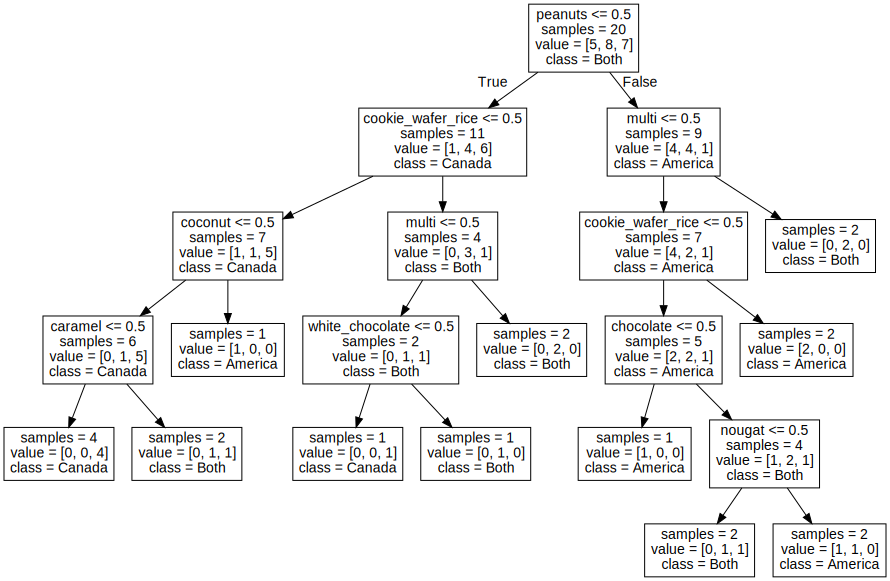

In [12]:
tree_plot = display_tree(X_train.columns, model) 
tree_plot

In [13]:
model1 = DecisionTreeClassifier(max_depth =1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

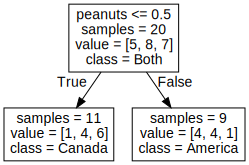

In [14]:
tree_plot1 = display_tree(X_train.columns, model1)
tree_plot1

In [15]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_score,test_score

(0.85, 0.4)

In [16]:
model = DecisionTreeClassifier(max_depth= 1)
model.fit(X_train, y_train)
score = cross_validate(model, X_train, y_train, cv = 5, return_train_score= True)
score['train_score'].mean()


0.525

In [17]:
results_dict = {
    "i":[],
    "train_score":[],
    "test_score":[]}
for i in range(1,20):
    model = DecisionTreeClassifier(max_depth= i)
    model.fit(X_train, y_train)
    score = cross_validate(model, X_train, y_train, cv = 5, return_train_score= True)
    results_dict['i'].append(i)
    results_dict['train_score'].append(score['train_score'].mean())   
    results_dict['test_score'].append(score['test_score'].mean())    
results_dict

{'i': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'train_score': [0.525,
  0.675,
  0.8,
  0.85,
  0.8625,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875],
 'test_score': [0.3,
  0.4,
  0.45,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5]}

In [18]:
results_df = pd.DataFrame(results_dict)
results_df.head()

,i,train_score,test_score
0,1,0.5250,0.30
1,2,0.6750,0.40
2,3,0.8000,0.45
3,4,0.8500,0.50
4,5,0.8625,0.50


In [19]:
depth_plot_df = results_df.melt(id_vars=['i'],
                          value_vars=['train_score','test_score'],
                          var_name='plot', value_name='score')
depth_plot_df.head()

,i,plot,score
0,1,train_score,0.5250
1,2,train_score,0.6750
2,3,train_score,0.8000
3,4,train_score,0.8500
4,5,train_score,0.8625


In [20]:
depth_chart = alt.Chart(depth_plot_df).mark_line().encode(
    alt.X('i:Q',axis=alt.Axis(title="Tree Depth")),
    alt.Y('score:Q'),
    alt.Color('plot:N', scale=alt.Scale(domain=['train_score', 'test_score'],
                                           range=['teal', 'gold']))
)

depth_chart

alt.Chart(...)

In [21]:
model_mss = DecisionTreeClassifier(min_samples_split= 2)
model_mss.fit(X_train,y_train)

DecisionTreeClassifier()

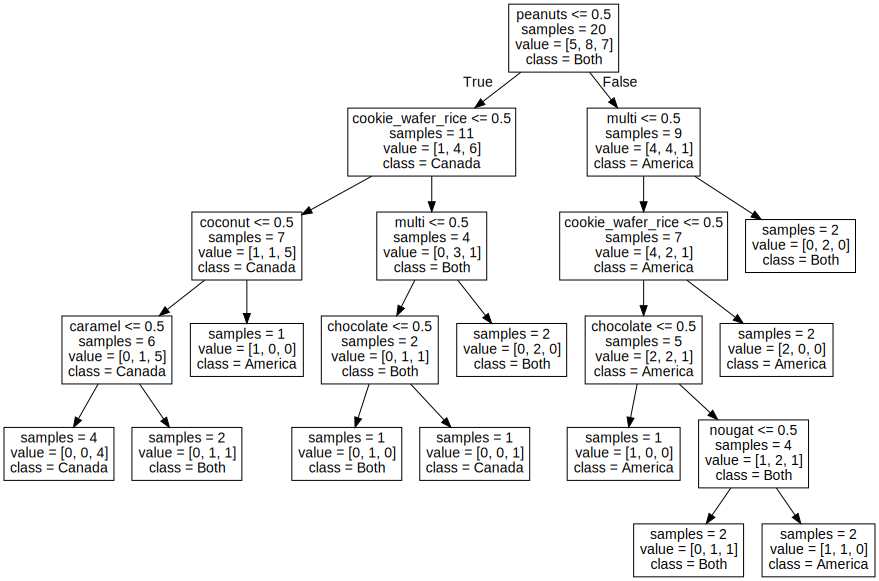

In [22]:
tree_plot = display_tree(X_train.columns, model_mss) 
tree_plot

In [23]:
model = DecisionTreeClassifier(min_samples_split= 3)
model.fit(X_train,y_train)
cv_score = cross_validate(model, X_train, y_train, return_train_score=True)
cv_score

{'fit_time': array([0.0049963 , 0.00399733, 0.00500154, 0.00399637, 0.00499749]),
 'score_time': array([0.00399899, 0.0040009 , 0.00199556, 0.00299478, 0.00498915]),
 'test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
 'train_score': array([0.875 , 0.8125, 0.8125, 0.875 , 0.8125])}

In [24]:
result_dict = {'i':[],
               'train_score':[],
               'test_score': [] }

for  i in range(2,20):
    model = DecisionTreeClassifier(min_samples_split= i)
    model.fit(X_train,y_train)
    cv_score = cross_validate(model, X_train, y_train, return_train_score=True)
    result_dict['i'].append(i)
    result_dict['train_score'].append(cv_score['train_score'].mean())
    result_dict['test_score'].append(cv_score['test_score'].mean())

min_samples_split = pd.DataFrame(result_dict)

In [25]:
min_samples_plot_df = min_samples_split.melt(id_vars=['i'],
                          value_vars=['train_score','test_score'],
                          var_name='plot', value_name='score')
min_samples_plot_df.head()

,i,plot,score
0,2,train_score,0.8750
1,3,train_score,0.8375
2,4,train_score,0.8250
3,5,train_score,0.8000
4,6,train_score,0.7625


In [26]:
min_sample_chart = alt.Chart(min_samples_plot_df).mark_line().encode(
    alt.X('i:Q',axis=alt.Axis(title="min_samples_split")),
    alt.Y('score:Q'),
    alt.Color('plot:N', scale=alt.Scale(domain=['train_score', 'test_score'],
                                           range=['teal', 'gold']))
)

min_sample_chart

alt.Chart(...)